# On the resolution of an FFT

When transforming a function sample to its frequency representation via FFT, the definition range needs to be transformed accordingly. The real space set over which the function was sampled and the frequency set over that the FFT values are valid are related as follows:

1. Both have the same numer of elements.
1. The real space *definition range limits* determine the **smallest frequency** or the **frequency step width**.
1. The real space *step width* determines the **frequency limits**.


If one wishes to get a smaller frequency step width for a signal's FFT while keeping the frequency limits, the real space signal sample needs to have

* the same (real space) step width,
* increased (real space) definition range limits.


It's obvious that the number of definition range elements needs to be increased as well in order to fullfill both necessities at the same time.

## Import stuff

In [1]:
import numpy as np
from numpy import fft as fft
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import sys
sys.path.append('../packages')
from auxiliary import *
from normal_distribution import *

## Show how to increase the resolution (but not the range) of an FFT

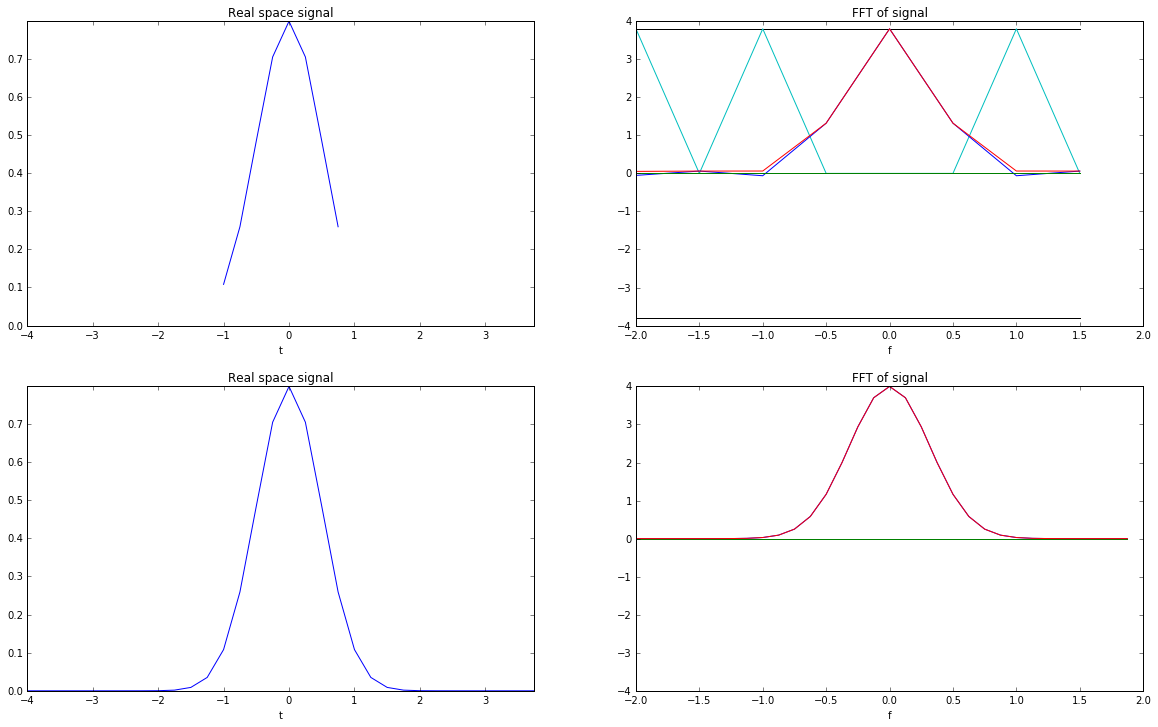

In [3]:
# Define normal distribution as time domain function
sigma   = 0.5
mu      = 0.
fct_g   = make_normal_distribution_density(sigma, mu)

# Define two time domains
xres_1  = 8
xmin_1  = -2.*sigma
xmax_1  = -xmin_1 * (xres_1-2) / xres_1
x_1     = np.linspace(xmin_1, xmax_1, xres_1)

factor  = 4
xres_2  = factor*xres_1
xmin_2  = factor*xmin_1
xmax_2  = -xmin_2 * (xres_2-2) / xres_2
x_2     = np.linspace(xmin_2, xmax_2, xres_2)

# Sample the time domain function for both domains
g_1     = fct_g(x_1)
g_2     = fct_g(x_2)

# FFT both samples
g_1_s   = swap_center_border(g_1)
G_1     = fft.fftshift(fft.fft(    g_1_s))
f_1     = fft.fftshift(fft.fftfreq(xres_1, x_1[1]-x_1[0]))

g_2_s   = swap_center_border(g_2)
G_2     = fft.fftshift(fft.fft(    g_2_s))
f_2     = fft.fftshift(fft.fftfreq(xres_2, x_2[1]-x_2[0]))



# Plot
fig = plt.figure(figsize=(20, 12))

sub1 = fig.add_subplot(2, 2, 1)
sub1.plot(x_1, g_1)
sub1.set_xlim([xmin_2, xmax_2])
sub1.set_ylim([0., np.max(g_1)])
sub1.set_title('Real space signal')
sub1.set_xlabel('t')

sub2 = fig.add_subplot(2, 2, 2)
plot_complex(f_1, G_1, axes=sub2)
sub2.set_xlim([-1./sigma, 1./sigma])
sub2.set_title('FFT of signal')
sub2.set_xlabel('f')

sub3 = fig.add_subplot(2, 2, 3)
plt.plot(x_2, g_2)
sub3.set_xlim([xmin_2, xmax_2])
sub3.set_ylim([0., np.max(g_2)])
sub3.set_title('Real space signal')
sub3.set_xlabel('t')

sub4 = fig.add_subplot(2, 2, 4)
plot_complex(f_2, G_2, axes=sub4)
sub4.set_xlim([-1./sigma, 1./sigma])
sub4.set_title('FFT of signal')
sub4.set_xlabel('f')
